<img src="mioti.png" style="height: 100px">
<center style="color:#888">Data Science with Python</center>

# Proyecto Final: El mejor compositor de todos los tiempos

## Miguel Espinosa Villanego &  Jorge Mateos-Aparicio González

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scikitplot as skplt

# El mejor compositor de todos los tiempos.


Soy el productor sueco Max Maxtin, con 23 uno en el top 100 de Billboard somos la tercera persona de la historia con más número uno solo superado por John Lenon, con 26 y por Paul McCartney, con 32. Pero eso no va a durará para siempre. He contratado a dos prometedores data scientist para que me ayuden a encontrar a partir de los datos cual es la receta de un hit, cuales son las principales razones que hacen que una canción destaque sobre las demás.

Para realizar su tarea les he dado un dataset que he ido recopilando desde mi primer gran hit, Baby One More Time (1999) hasta 2020 en el que he les incluyo los parámetros:

* artist: Nombre del artista (str)
* song: Nombre de la canción (str)
* duration_ms: Duración de la canción en milisegundos (int)
* explicit: Si el contenido de la canción no es apropiado para todos los públicos (bool)
* year: Año en el que se publicó la canción
* danceability: determina lo bailable que es una canción en función de una combinación de parámetros musicales como el tempo, la fuerza del beat o la estabilidad del ritmo. Se mide desde 0 (siendo cero el menor valor de bailabilidad) hasta 1 (máximo valor de la baildad) (float)
* energy: Desde 0 a 1 mide la percepción de intensidad y actividad de una canción. (float)
* key: clave de la canción. Siguiendo la afinación clásica: C=0, C#=1, ... .Si es ambiguo le asignamos valor -1. (int)
* loudness: media de decibelios medido para la canción, sonando en las mismas condiciones (float)
* mode: modalidad de la canción. Modalidad mayor siendo 1 y menor 0.
* speechiness: mide el porcentaje de la canción en el que se detectan palabras, siendo 1 un poema y 0 un tema instrumental. (float)
* acousticness: mide si el tema acústico o digital, desde 0 a 1, siendo 1 una canción claramente acústica. (float)
* Instrumentalness: Predice si una canción es cantanda o instrumental, más cercano a 1 supone que menos vocal es. (float)
* liveness: Detecta la presencia de público en la grabación, desde 0 a 1, siendo una canción con un valor cercano a uno claramente grabada en un concierto. (float)
* valence: Desde 0 a 1 mide la positividad de la canción, canciones con valores cercanos a 0 serían canciones tristes o negativas y canciones con valores cercanos a 1 son canciones alegres o eufóricas. (float)
* tempo: la media de los BPM, que es una medida la velocidad de la canción. (float).
* genre: Género de la canción. (str)
* popularity: a mayor valor mayor popularidad (int)

## Obteniendo el dataset:

Para conseguir los datos de los hits de los últimos veinte años hemos recurrido a Kaggle, en el que encontramos un dataset que justamente nos trae esta información. Dado que se encuentra en Kaggle y este dispone de una API para descargar sus datos ha sido el método que hemos empleado:

**Importante**: 

* Para poder emplear Kaggle es necesario tener una cuenta, en el caso de no ser así simplemente hemos dejado los datos dentro de la carpeta y por tanto no es necesario recurrir a la API para obtener los datos.

* En el caso de tener una cuenta de Kaggle basta con importar la API y descargar los datos.

* En el caso de que nunca se haya importado Kaggle abajo se deja el comando para su instalación. Además será necesario obtener un fichero json que nos da Kaggle al pedirle un API TOKEN desde las opciones de nuestra cuenta. Una vez tengamos el fichero debemos importar Kaggle, lo que nos dará un error exponiendo que no tenemos el fichero json en una carpeta de la que nos da el path en la descripción del error. Basta con ir a esa carpeta y pegar el archivo json, para volver a importar Kaggle de manera satisfactoria.

In [2]:
# instalar requisitos:

# import sys
# !{sys.executable} -m pip install kaggle

In [3]:
from kaggle.api.kaggle_api_extended import KaggleApi # Importamos la API
api = KaggleApi() # La traemos y la autenticamos para poder emplearla
api.authenticate()
api.dataset_download_file('paradisejoy/top-hits-spotify-from-20002019', # Descargamos el dataset
                         file_name='songs_normalize.csv');

In [4]:
data_songs = pd.read_csv('songs_normalize.csv')
data_songs.info() # Vemos que el dataset no presenta valores nulos, lo que nos evita cierto preprocesamiento

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


* Ya podemos observar que el dataset no presenta valores nulos, lo que nos ahorra parte de la etapa de preprocesamiento de los datos.

In [5]:
data_songs.head(5)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


## Preprocesamiento de los datos: Generando el dataset

Para generar el dataset de entrenamiento emplearemos solo aquellos que tienen una naturaleza musical dado que son aquellos que no interesa estudiar, eliminaremos parámetros más técnicos como la duración o los decibelios.


Una vez hayamos realizado la separación entre top100 y los demás, le diremos a Max que emplee la mediana de ambos datos


Sacamos también la popularidad que la emplearemos para generar las clases.

In [6]:
dataset = data_songs.copy()
dataset.drop(columns={'artist', 'song', 'year', 'duration_ms', 'loudness'}, inplace=True)

In [7]:
dataset.head()

,explicit,popularity,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,False,77,0.751,0.834,1,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,False,79,0.434,0.897,0,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,False,66,0.529,0.496,7,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,False,78,0.551,0.913,0,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,False,65,0.614,0.928,8,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


La mayoría de los parámetros ya se encuentran tipificados, los tenemos dentro del rango [0,1] por lo tanto ya están listos. Trabajamos sobre el resto:

### Parámetro explicit:

La variable es booleana, debemos presentarla de forma binaria. Para ello la pasamos a tipo int:


In [8]:
dataset.explicit = dataset.explicit.astype('int')

### Parámetro key

El parámetro key representa la clave en la que está escrita la canción, esto implica que a pesar de venir en forma de int realmente es una categoría. Dejarla así supondría un problema dado que el modelo interpreta los números como pesos o distancias, no como categorías, además se presenta el problema añadido de que son bastante categorías para el tamaño del dataset:

In [9]:
dataset.key.unique(), dataset.key.unique().shape # Vemos que tenemos doce categorías (como doce son las notas cromáticas)

(array([ 1,  0,  7,  8,  2,  5,  6, 11,  3, 10,  9,  4], dtype=int64), (12,))

Vemos que no tenemos canciones con claves ambiguos

In [10]:
keys = pd.get_dummies(dataset.key, drop_first=True) # Aplicamos drop_first para quitarnos una columna, dado que es una información que se infiere del resto
keys.head(3)

,1,2,3,4,5,6,7,8,9,10,11
0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0


In [11]:
keys.sum() # Mediante sum() podemos ver como se distribuyen las distintas claves en el da

1     267
2     158
3      60
4     126
5     182
6     154
7     197
8     173
9     157
10    129
11    199
dtype: int64

Vemos que si queremos incoporar la clave debemos añadir doce columnas a nuestro dataset, siendo un dato que está equitativamente distribuido (lo que impide poder quedarse con unas determinadas clases e ignorar otras) y que además es puramente técnico procederemos a omitirlo.

In [12]:
dataset.drop(columns={'key'}, inplace=True)
# dataset = pd.concat([dataset, keys], axis=1)
dataset.head(5)

,explicit,popularity,danceability,energy,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0,77,0.751,0.834,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,0,79,0.434,0.897,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,0,66,0.529,0.496,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,0,78,0.551,0.913,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,0,65,0.614,0.928,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


### Parámetro tempo:

Tempo representa los beats por minuto o pulso de la canción Dado que se encuentra entre los 60 y  210  [bpm] es un parámetro al que el modelo puede dar peso en exceso, por lo tanto debemos tipificarlo, de tal manera de que tanga el mismo peso que las demas variables:

In [13]:
dataset.tempo.describe() # Vemos que el rango va desde los -20 hasta -0.276

count    2000.000000
mean      120.122558
std        26.967112
min        60.019000
25%        98.985750
50%       120.021500
75%       134.265500
max       210.851000
Name: tempo, dtype: float64

In [14]:
# Aplicamos la vectorización de numpy para realizar el tipificado:

dataset.tempo = ( dataset.tempo - dataset.tempo.min() ) /  ( dataset.tempo.max() - dataset.tempo.min())

In [15]:
dataset.head(5)

,explicit,popularity,danceability,energy,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0,77,0.751,0.834,0,0.0437,0.3000,0.000018,0.3550,0.894,0.232272,pop
1,0,79,0.434,0.897,1,0.0488,0.0103,0.000000,0.6120,0.684,0.588118,"rock, pop"
2,0,66,0.529,0.496,1,0.0290,0.1730,0.000000,0.2510,0.278,0.509441,"pop, country"
3,0,78,0.551,0.913,0,0.0466,0.0263,0.000013,0.3470,0.544,0.397615,"rock, metal"
4,0,65,0.614,0.928,0,0.0516,0.0408,0.001040,0.0845,0.879,0.746771,pop


### Parámetro genre

El genre es el género de la canción, podemos ver que las canciones además pueden tener hasta dos géneros:

In [16]:
dataset.genre.unique(), dataset.genre.unique().shape # Vemos que tenemos hasta 59 géneros diferentes

(array(['pop', 'rock, pop', 'pop, country', 'rock, metal',
        'hip hop, pop, R&B', 'hip hop', 'pop, rock', 'pop, R&B',
        'Dance/Electronic', 'pop, Dance/Electronic',
        'rock, Folk/Acoustic, easy listening', 'metal', 'hip hop, pop',
        'R&B', 'pop, latin', 'Folk/Acoustic, rock',
        'pop, easy listening, Dance/Electronic', 'rock',
        'rock, blues, latin', 'pop, rock, metal', 'rock, pop, metal',
        'hip hop, R&B', 'pop, Folk/Acoustic', 'set()',
        'hip hop, pop, latin', 'hip hop, Dance/Electronic',
        'hip hop, pop, rock', 'World/Traditional, Folk/Acoustic',
        'Folk/Acoustic, pop', 'rock, easy listening',
        'World/Traditional, hip hop', 'hip hop, pop, R&B, latin',
        'rock, blues', 'rock, R&B, Folk/Acoustic, pop', 'latin',
        'pop, R&B, Dance/Electronic', 'World/Traditional, rock',
        'pop, rock, Dance/Electronic', 'pop, easy listening, jazz',
        'rock, Dance/Electronic', 'World/Traditional, pop, Folk/Acoustic'

Dada la cantidad de géneros diferentes que tenemos vamos a tomas solo el primer género de las canciones; mediante la vectorización de string podemos identificar los separadores y tomar solo el primer género

In [17]:
dataset.genre = dataset.genre.str.split('/').str[0]
dataset.genre = dataset.genre.str.split(',').str[0]

Vemos que hay un fallo y que ha tomado un género llamado _set()_. Estudiamos la variable en concreto para ver que estrategia podemos emplear

In [18]:
dataset[dataset.genre == 'set()' ]

,explicit,popularity,danceability,energy,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
95,1,71,0.625,0.850,1,0.0495,0.346000,0.000233,0.1740,0.633,0.229673,set()
216,0,66,0.607,0.923,1,0.0948,0.019300,0.000001,0.0924,0.868,0.827411,set()
291,0,40,0.661,0.746,1,0.0420,0.109000,0.000000,0.3250,0.502,0.558031,set()
428,0,57,0.805,0.754,0,0.0394,0.088400,0.000002,0.1170,0.880,0.453551,set()
455,0,51,0.853,0.911,0,0.1250,0.043600,0.005710,0.2870,0.802,0.470676,set()
481,1,64,0.828,0.653,0,0.0653,0.214000,0.000003,0.0404,0.575,0.056275,set()
545,0,42,0.561,0.452,0,0.0336,0.409000,0.000000,0.1060,0.316,0.119106,set()
645,0,46,0.679,0.922,0,0.0294,0.000241,0.690000,0.0697,0.806,0.457443,set()
710,0,43,0.762,0.754,0,0.0460,0.000220,0.066500,0.1460,0.715,0.457509,set()
729,0,17,0.847,0.861,1,0.0603,0.278000,0.029000,0.0626,0.724,0.450004,set()


Dado que solo tenemos 22 registros en un dataset de 3k muestras podemos prescindir de las mismas. Debemos acumular los indices en una variable para también eliminar las muestras en el datset_Y:

In [19]:
set_indeces = dataset[dataset.genre == 'set()'].index

In [20]:
dataset.drop(set_indeces, inplace=True)

In [21]:
dataset.genre.unique()

array(['pop', 'rock', 'hip hop', 'Dance', 'metal', 'R&B', 'Folk', 'World',
       'latin', 'country', 'easy listening'], dtype=object)

In [22]:
genres = pd.get_dummies(dataset.genre, drop_first=True)
genres

,Folk,R&B,World,country,easy listening,hip hop,latin,metal,pop,rock
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,1,0
1996,0,0,0,0,0,0,0,0,1,0
1997,0,0,0,0,0,1,0,0,0,0
1998,0,0,0,0,0,0,0,0,1,0


In [23]:
s= genres.sum().sort_values(ascending=True)
s

easy listening      1
Folk                4
metal               9
World              10
country            11
R&B                13
latin              15
rock              162
hip hop           776
pop               936
dtype: int64

<AxesSubplot:title={'center':'Genre uniques'}>

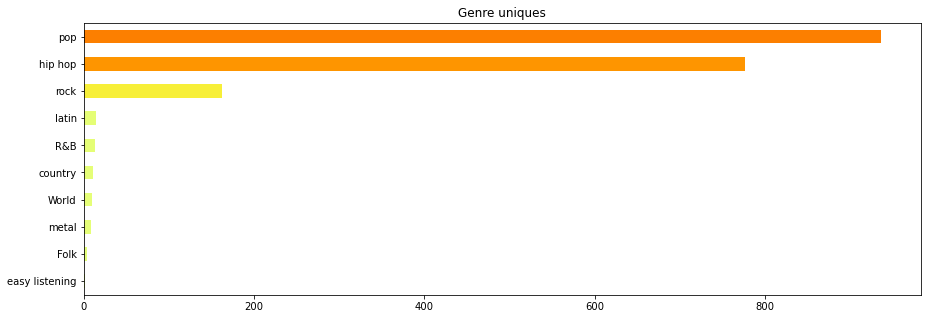

In [24]:
from matplotlib import cm
from matplotlib import colors

colormap = cm.get_cmap("Wistia")
normdata = colors.Normalize(min(s), max(s))
colores =colormap(normdata(s))
plt.rcParams["figure.figsize"] = (15, 5)
s.plot.barh(title='Genre uniques', color=colores);

De una forma visual se pueden ir sacando conclusiones de que el género pop y hip hop ha triunfado sobre los demás de manera fulminante

In [25]:
dataset.drop( columns={'genre'}, inplace=True)
dataset = pd.concat([dataset, genres], axis=1)
dataset.head()

,explicit,popularity,danceability,energy,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,Folk,R&B,World,country,easy listening,hip hop,latin,metal,pop,rock
0,0,77,0.751,0.834,0,0.0437,0.3000,0.000018,0.3550,0.894,...,0,0,0,0,0,0,0,0,1,0
1,0,79,0.434,0.897,1,0.0488,0.0103,0.000000,0.6120,0.684,...,0,0,0,0,0,0,0,0,0,1
2,0,66,0.529,0.496,1,0.0290,0.1730,0.000000,0.2510,0.278,...,0,0,0,0,0,0,0,0,1,0
3,0,78,0.551,0.913,0,0.0466,0.0263,0.000013,0.3470,0.544,...,0,0,0,0,0,0,0,0,0,1
4,0,65,0.614,0.928,0,0.0516,0.0408,0.001040,0.0845,0.879,...,0,0,0,0,0,0,0,0,1,0


## Preprocesamiento: La popularidad es lo que buscamos

Max nos ha pedido que lo primero que hagamos es establecer lo que es un hit en función, para ello nos ha pedido que nos basemos en la popularidad de algunos de sus top100. 

Comenzamos analizando los datos de manera general:

In [26]:
dataset.popularity.isnull().any() # Revisamos que la popularidad no presenta valores nulos.

False

In [27]:
print('El rango de los datos de popularidad es desde {pop_min} hasta {pop_max}'.format( pop_min=dataset.popularity.min(), pop_max=dataset.popularity.max()))

El rango de los datos de popularidad es desde 0 hasta 89


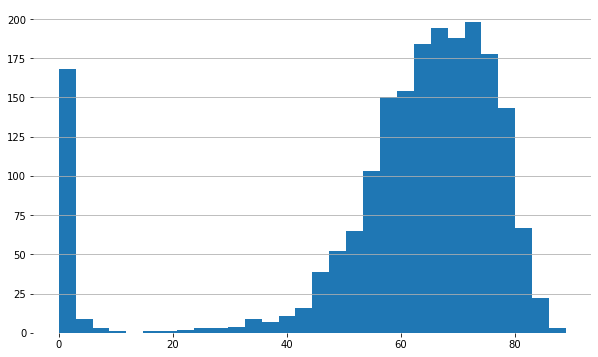

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))

dataset.popularity.hist(bins=30);

ax.grid(axis='x')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

* Las lista de canciones que nos ha pasado Max como referencia para crear una clase de top100s:

In [29]:
max_martin_top100_list = ['So What', 'california Gurls', 'Teenage Dream', 'Dark Horse', 'Roar', 'Shake It Off', 'Raise Your Glass']

max_martin_top100 = data_songs.loc[(data_songs.song == 'So What') | (data_songs.song == 'California Gurls') | (data_songs.song == 'Shake It Off') \
    | (data_songs.song == 'Dark Horse') | (data_songs.song == 'Raise Your Glass') | (data_songs.song == 'Teenage Dream') | (data_songs.song == 'Roar')]

max_martin_top100 

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
854,P!nk,So What,215160,True,2008,76,0.534,0.870,11,-3.078,0,0.0425,0.000334,0.000000,0.241,0.462,126.019,pop
1008,Katy Perry,California Gurls,234653,False,2012,72,0.791,0.754,0,-3.729,1,0.0569,0.004460,0.000000,0.163,0.425,125.014,pop
1087,Katy Perry,Teenage Dream,227741,False,2010,69,0.719,0.798,10,-4.582,1,0.0361,0.016200,0.000002,0.134,0.591,120.011,pop
1193,P!nk,Raise Your Glass,202960,True,2010,76,0.700,0.709,7,-5.006,1,0.0838,0.004800,0.000000,0.029,0.624,122.019,pop
1367,Katy Perry,Roar,223546,False,2013,73,0.554,0.772,7,-4.821,0,0.0418,0.004870,0.000007,0.354,0.455,179.984,pop
1401,Katy Perry,Dark Horse,215672,False,2013,74,0.647,0.585,6,-6.123,1,0.0512,0.003140,0.000000,0.165,0.353,131.934,pop
1473,Taylor Swift,Shake It Off,219200,False,2014,79,0.647,0.800,7,-5.384,1,0.1650,0.064700,0.000000,0.334,0.942,160.078,pop


In [30]:
print('Vemos que la popularidad media necesaria para ser un top100 Billboard de Max Martin es de {pop_max_mean},\
    pero con unos 71 ya podemos encontrar top100. Emplearemos el 71 como referencia.'.format(pop_max_mean = round(max_martin_top100.popularity.mean())))

Vemos que la popularidad media necesaria para ser un top100 Billboard de Max Martin es de 74,    pero con unos 71 ya podemos encontrar top100. Emplearemos el 71 como referencia.


In [31]:
top100 = dataset.popularity.copy()

top100.loc[top100 < 71] = 0
top100.loc[top100 >= 71] = 1

In [32]:
dataset.drop(columns={'popularity'}, inplace=True)
dataset = pd.concat([dataset, top100], axis=1)

In [33]:
dataset.head()

,explicit,danceability,energy,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,R&B,World,country,easy listening,hip hop,latin,metal,pop,rock,popularity
0,0,0.751,0.834,0,0.0437,0.3000,0.000018,0.3550,0.894,0.232272,...,0,0,0,0,0,0,0,1,0,1
1,0,0.434,0.897,1,0.0488,0.0103,0.000000,0.6120,0.684,0.588118,...,0,0,0,0,0,0,0,0,1,1
2,0,0.529,0.496,1,0.0290,0.1730,0.000000,0.2510,0.278,0.509441,...,0,0,0,0,0,0,0,1,0,0
3,0,0.551,0.913,0,0.0466,0.0263,0.000013,0.3470,0.544,0.397615,...,0,0,0,0,0,0,0,0,1,1
4,0,0.614,0.928,0,0.0516,0.0408,0.001040,0.0845,0.879,0.746771,...,0,0,0,0,0,0,0,1,0,0


In [34]:
print('De la clase minoritaria tenemos {min_class} y de la mayoritaria tenemos {may_class}, por lo tanto la clase minoritaria supone el {percen:%} del \
dataset'.format(min_class = dataset.popularity.sum(), may_class = (dataset.popularity.count() - dataset.popularity.sum()), percen = (dataset.popularity.sum()/dataset.popularity.count())))

De la clase minoritaria tenemos 667 y de la mayoritaria tenemos 1311, por lo tanto la clase minoritaria supone el 33.720930% del dataset


In [35]:
# Separamos el dataset:

dataset_X = dataset.drop(columns={'popularity'}) # Eliminamos las clases
dataset_Y = dataset.popularity.copy()

* Dado que la clase minoritaria solo supone el 25% del dataset una vez terminado el prerpocesamiento del dataset aplicaremos diferentes técnicas de undersampling y oversampling para balancearlo.

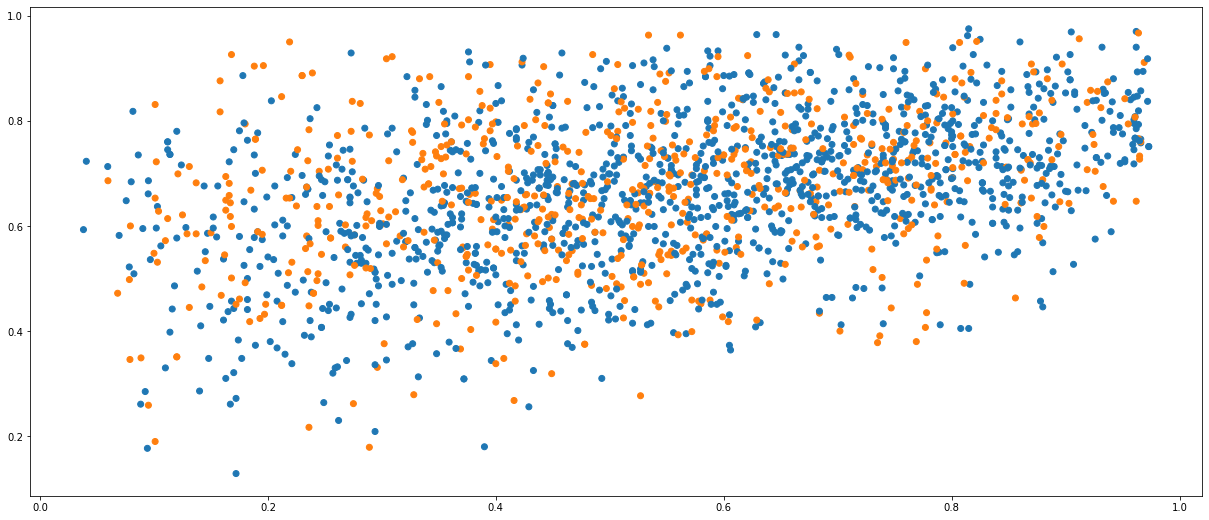

In [36]:
# Primero echamos un vistazo a la distribución de los datos:

plt.figure(figsize=(21, 9))
colors = dataset.popularity.map({0 : "#1f77b4", 1: "#ff7f0e"})
plt.scatter(x = dataset.valence, y = dataset.danceability, c=colors);

In [37]:
from imblearn.under_sampling import EditedNearestNeighbours

enn = EditedNearestNeighbours(n_neighbors = 2)
enn.fit_resample(dataset_X, dataset_Y)
print('Filas que nos quedamos:', len(enn.sample_indices_))

Filas que nos quedamos: 1272


In [38]:
dataset_X_enn, dataset_Y_enn = dataset_X.iloc[enn.sample_indices_], dataset_Y.iloc[enn.sample_indices_]

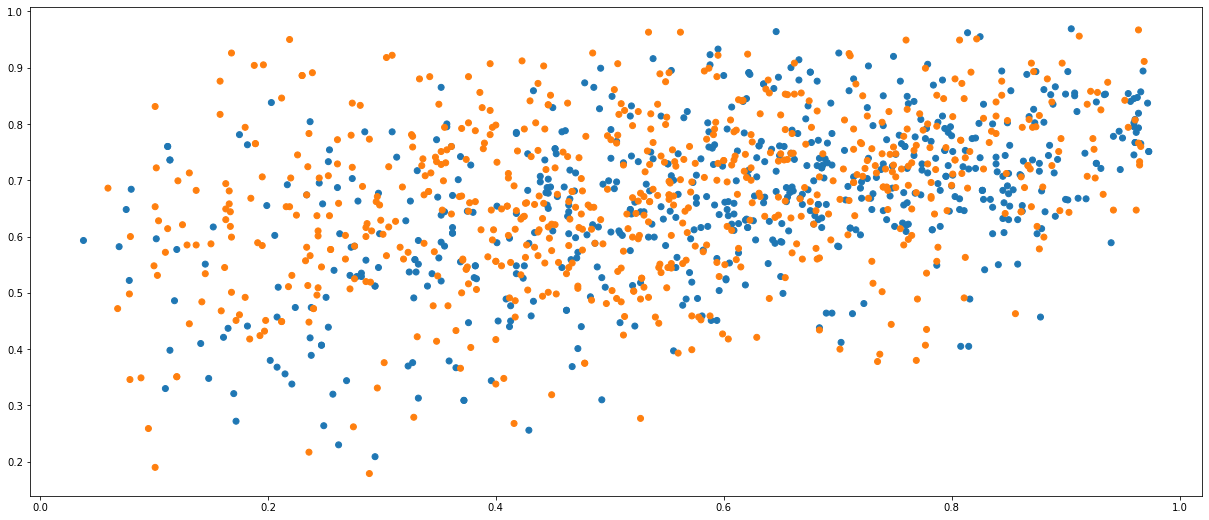

In [39]:
plt.figure(figsize=(21, 9))
colors = dataset_Y_enn.map({0 : "#1f77b4", 1: "#ff7f0e"})
plt.scatter(x = dataset_X_enn.valence, y = dataset_X_enn.danceability, c=colors);

In [40]:
print('De la clase minoritaria tenemos {min_class} y de la mayoritaria tenemos {may_class}, por lo tanto la clase minoritaria supone el {percen:%} del \
dataset'.format(min_class = dataset_Y_enn.sum(), may_class = (dataset_Y_enn.count() - dataset_Y_enn.sum()), percen = (dataset_Y_enn.sum()/dataset_Y_enn.count())))

De la clase minoritaria tenemos 667 y de la mayoritaria tenemos 605, por lo tanto la clase minoritaria supone el 52.437107% del dataset


* Vemos que ya tenemos un dataset balanceado, procedemos a separarlo entre train y test:

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset_X_enn, dataset_Y_enn, test_size=.2, random_state=132)

* En este caso nos hemos decicido por emplear random forest, no solo por la eficacia del modelo respecto a su simpleza sino porque contiene el método *_feature_importances_* que nos permite obtener los parámetros con los que el modelo a disminuido de manera más eficaz la entropía en la distribución, esto es, los parámetros que más le han ayudado al modelo a clasificar de manera efectiva.

* Como hiperparámetro emplearemos 200 estimadores o árboles de decisición:

In [42]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 200, \
    random_state=123)

In [43]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=123)

In [44]:
y_predict = random_forest.predict(X_test)

In [45]:

print('Tenemos un modelo que tiene la probabilidad del {score:%} de clasificar de manera satisfactoria los grandes éxtios'.format(score = random_forest.score(X_test, y_test)))

Tenemos un modelo que tiene la probabilidad del 67.843137% de clasificar de manera satisfactoria los grandes éxtios


* La matriz de confusión:

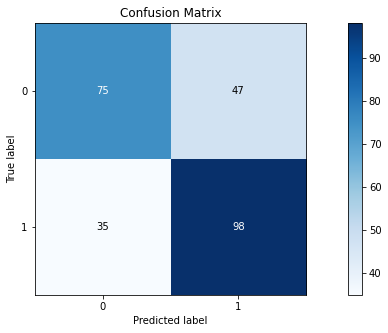

In [46]:
from sklearn.metrics import confusion_matrix

confusion_matrix_values = skplt.metrics.confusion_matrix(y_test, y_predict)
skplt.metrics.plot_confusion_matrix(y_test, y_predict);

In [47]:
y_proba = random_forest.predict_proba(X_test)

* La curva ROC:

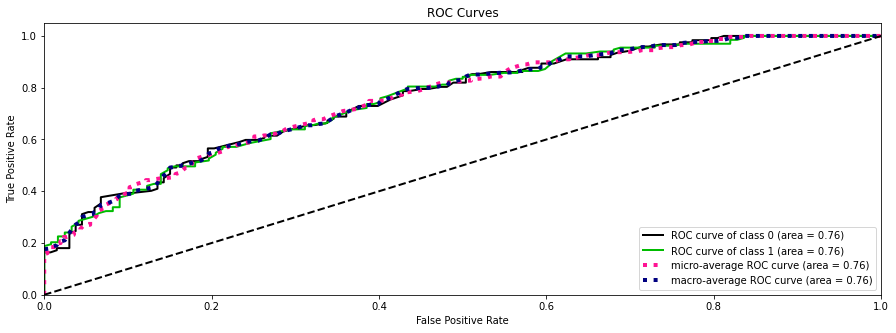

In [48]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc(y_test, y_proba)
plt.show()

* Desde la curva ROC ya podemos apreciar que nuestro modelo no es especialmente bueno dado que área que encierra la curva es escaso.

In [49]:
results = pd.DataFrame({'parameters':dataset_X.columns, 'values (%)':random_forest.feature_importances_*100})
results.groupby('parameters').sum().sort_values(by='values (%)', ascending=False)


,values (%)
parameters,
valence,12.643457
energy,12.134615
acousticness,12.125739
speechiness,11.936613
liveness,11.431367
danceability,10.813650
tempo,10.597455
instrumentalness,6.581083
rock,2.521922


* Ahora que conocemos los parámetros que más han influenciado al modelo para clasificar posibles top100. Ahora estudiaremos que valores debemos emplear de cada uno de ellos para crear un número 1 del top100 de Billboard:

In [50]:
# Los siete parámetros que más emplea el modelo de (entropía)
results.groupby('parameters').sum().sort_values(by='values (%)', ascending=False)[:7]

,values (%)
parameters,
valence,12.643457
energy,12.134615
acousticness,12.125739
speechiness,11.936613
liveness,11.431367
danceability,10.813650
tempo,10.597455


Determinamos ahora los valores específicos de cada una de las variables que debemos emplear para generar nuestro número 1 del Billboard

In [51]:
great_hits = dataset[dataset.popularity == 1]

results['gh_values'] = [great_hits[x].median() for x in results.parameters]

results[:10].groupby('parameters').sum().sort_values(by='values (%)', ascending=False)

,values (%),gh_values
parameters,,
valence,12.643457,0.528000
energy,12.134615,0.717000
acousticness,12.125739,0.058400
speechiness,11.936613,0.063200
liveness,11.431367,0.123000
danceability,10.813650,0.674000
tempo,10.597455,0.397502
instrumentalness,6.581083,0.000000
mode,2.257037,1.000000


Como a Max no le gustan las matemáticas vamos a facilitarle la compresión de nuestro estudio de una forma más artística: Le enseñaremos cuanto peso tiene cada variable a tener en cuenta para que su próximo lanzamiento sea un éxito y luego, mediante un diagrama de violines, otro gráfico para visualizar la distribución de los datos y su densidad de probabilidad:

* Se visualizan con tonos más oscuros las variables que tienen un peso mayor para determinar un éxito:

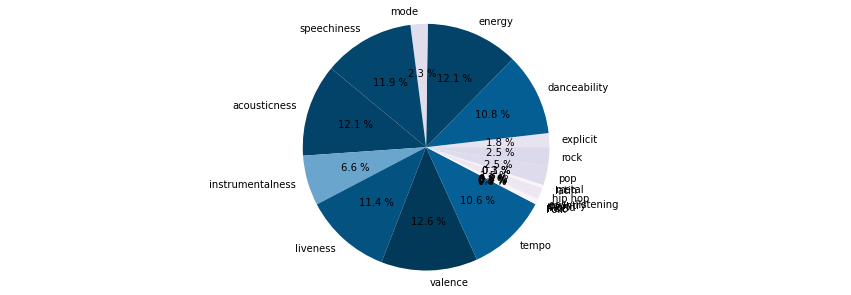

In [52]:
from matplotlib import cm
from matplotlib import colors

colormap = cm.get_cmap("PuBu")
normdata = colors.Normalize(min(results['values (%)']), max(results['values (%)']))
colores =colormap(normdata(results['values (%)']))
plt.pie(results['values (%)'], labels=results["parameters"], autopct="%0.1f %%", colors=colores)
ax.set_title('Distribución por violines del rango de éxito de las variables')
plt.axis("equal")
plt.rcParams["figure.figsize"] = (15, 15)

plt.show()

* Y para conocer qué valor óptimo deberían de tener las variables:

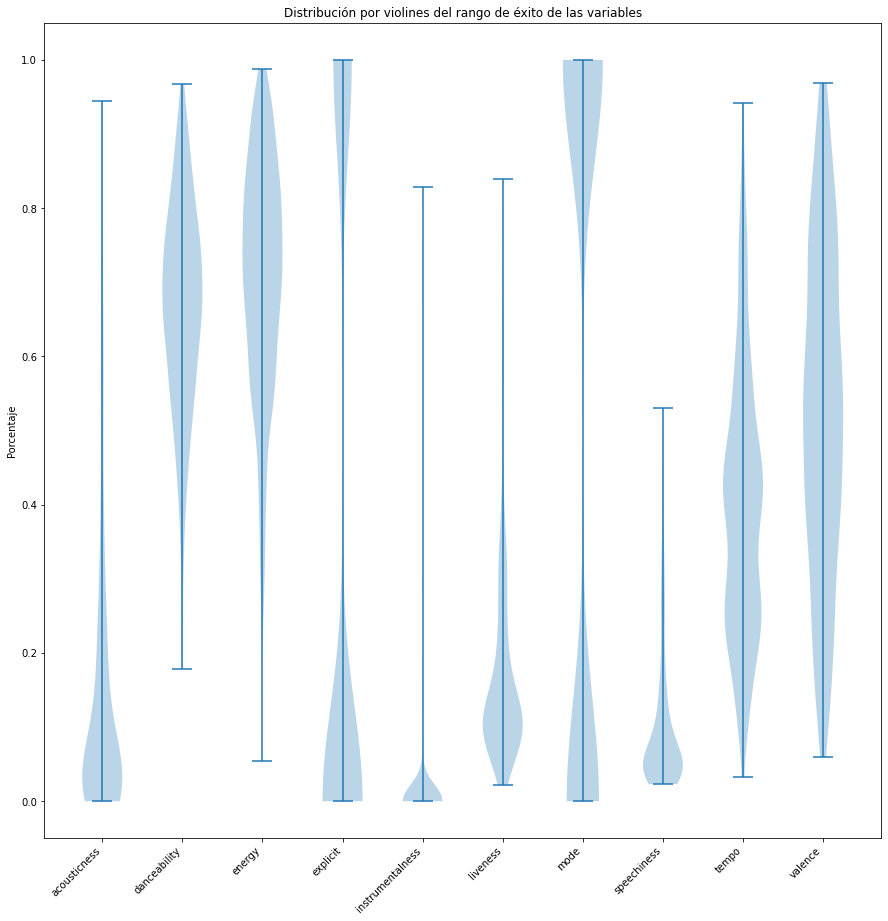

In [53]:
dataframe = great_hits

acousticness = dataframe.acousticness
danceability = dataframe.danceability
energy = dataframe.energy
explicit = great_hits["explicit"] #Es un parámetro booleano: o es explícito (1) o no lo es (0), aunque se puede codificar como las demás variables ya que se pasó a forma binaria (int)
instrumentalness = dataframe.instrumentalness
liveness = dataframe.liveness
mode = great_hits["mode"] #Es un parámetro booleano: o tiene tonalidad mayor (1) o menor (0)
speechiness = dataframe.speechiness
tempo = dataframe.tempo
valence = dataframe.valence

fig, ax = plt.subplots()

# Creación del plot
ax.violinplot([acousticness, danceability, energy,explicit,instrumentalness,liveness,mode,speechiness,tempo,valence])


# Títulos y formato

ax.set_title('Distribución por violines del rango de éxito de las variables')
ax.set_xticks([1,2,3,4,5,6,7,8,9,10])
ax.set_xticklabels(["acousticness", "danceability", "energy","explicit","instrumentalness","liveness","mode","speechiness","tempo","valence"])
plt.xticks(rotation=45, ha="right")
plt.rcParams["figure.figsize"] = (15, 5)
ax.set_ylabel('Porcentaje')

plt.show()

Se observa que las zonas con mayor densidad son las predominantes en la elección del valor de la variable. Además, como era de esperar, en las variables "explicit" y "mode" aparecen 2 áreas extremas en la distribución por violines: Esto se debe a que son datos binarios (o es explícito o no lo es, o tiene tonalidad mayor o menor). Éstas tienen una mayor área cuando "explicit" se aproxima a 0 y "mode" a 1. 

# Conclusiones:

Concluimos que la receta del éxito es:

* Un tema ni especialmente alegre ni triste

* Que transmite cierta energía pero no en exceso

* No es acústico, la voz tiene predominio sobre la música y debe ser un sonido algo artificial, claramente de estudio

* Es bailable

* No tiene secciones puramente instrumentales

* Está en modo mayor y apta para todos los públicos

* Género: Vemos que debe ser una canción de pop o hip hop, pero nunca de folk

* Tempo: Debe tener alrededor de 120 bpm

* Clave: A poder ser debe ser escrita en A#

* Decibelios: Y unos decibelios de -5.3 DB


In [54]:
great_hits_complete = data_songs.loc[data_songs.popularity > 71]

print('La duración que debe tener la canción es de {duration} minutos'.format( duration = ( great_hits_complete.duration_ms.median()*(10e-4)/60 )) )
print('El tempo que debe tener la canción es de {tempo} BPM'.format( tempo = ( great_hits_complete.tempo.median())))
print('Los decibelios medios que debe tener la canción es de {loudness} DB'.format(loudness = ( great_hits_complete.loudness.median())))
print('La clave de la canción debe ser la número {key}, esto es A# (La sostenido):'.format(key = ( great_hits_complete.groupby('key').count().sort_values(by='key', ascending=False).index[0])))

great_hits_complete.groupby('key').count().sort_values(by='key', ascending=False).index[0]

La duración que debe tener la canción es de 3.6786666666666665 minutos
El tempo que debe tener la canción es de 119.961 BPM
Los decibelios medios que debe tener la canción es de -5.322 DB
La clave de la canción debe ser la número 11, esto es A# (La sostenido):


11

### Ejemplos de canciones que cumplen las carácterísticas:

Para nuestra sorpresa, a pesar de que nuestra investigación está basada en un dataset hasta 2020, actualmente (2022) las 5 primeras canciones que se encuentran en el Top 50 Global de Spotify coinciden los resultados y conclusiones del proyecto (según la fuente musicstax https://musicstax.com/es):

* As it was (Harry Styles), la sesión Bizarrap con Quevedo y Yo Me Porto Bonito (Bad Bunny) están a -5.34, -5.5 y -5.11 DB, respectivamente

* Running Up That Hill (Kate Bush) está en clave A#

* Todas las canciones tienen una instrumentalidad nula, con muy baja vivacidad (grabadas en estudios y no en conciertos) y con positividad neutral (hay canciones que tienen algo más del 50% y canciones que menos, pero nunca tienen valores extremos)

* 4 de 5 canciones tienen una energía alrededor del 70% y bailabilidad alrededor del 60%

* Los géneros de las canciones son: 2 de pop, 1 de hip hop, 1 de new wave (pop mezclado con **rock**, tercer género con posibilidades de ser un éxito) y 1 de reggaeton. De aquí se puede sacar la conclusión que el pop predomina sobre todos los géneros como se ha determinado en el estudio, que el hip hop también es relevante (apareciendo en uno de los 5 mejores temas del momento a nivel mundial) y que existe "un género anómalo" como es el reggaeton. Nuestro dataset recoge las canciones desde 1980 hasta 2020 y, en estos recientes años (especialmente en los 2 últimos años que no tenemos dicha información) el reggaeton ha tomado una gran fuerza e importancia en la música

Lo tenemos todo, ya no hay dudas: convertiremos a Max Martin en... ¡el mejor compositor de todos los tiempos!

¿Comenzamos Max?